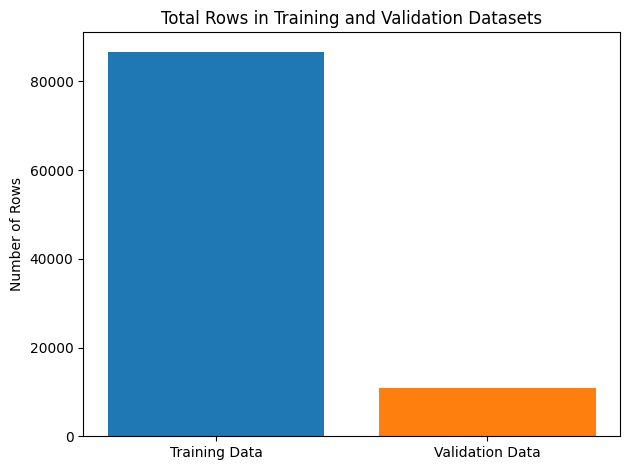

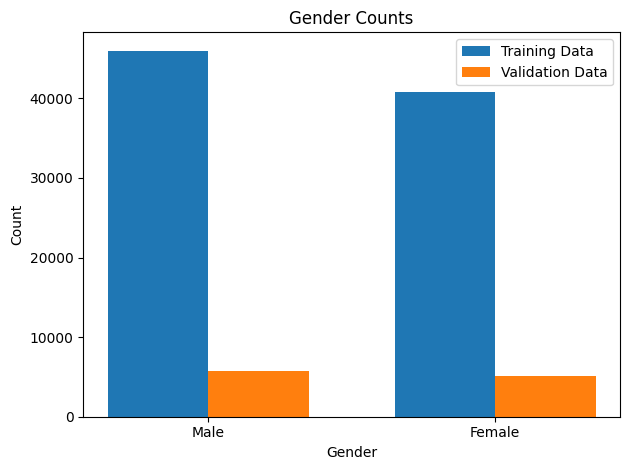

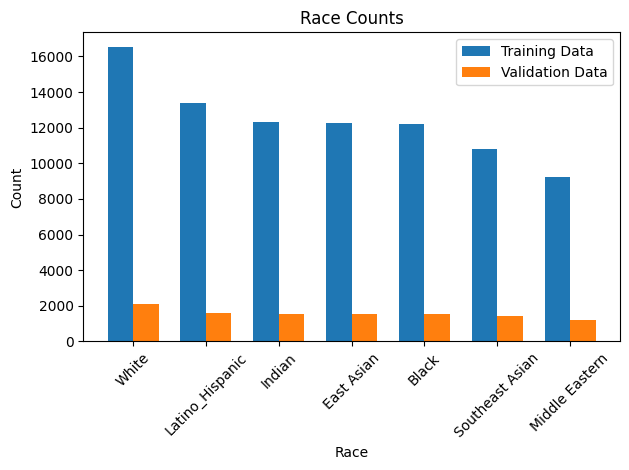

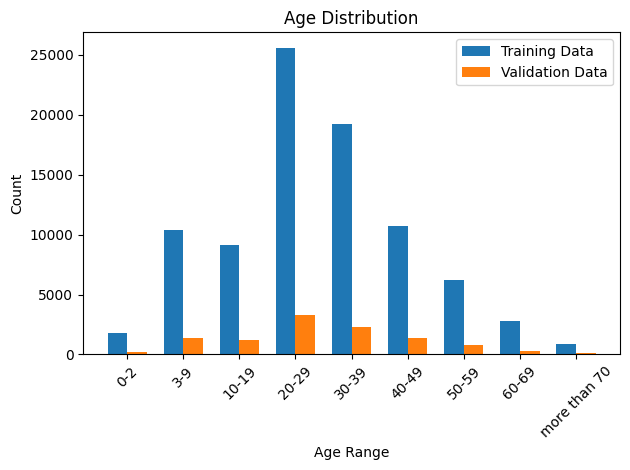

/var/folders/qq/_k5grsq97vz4bn2xgzvw12r40000gn/T/ipykernel_66510/364208220.py:100: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_images = unique_pairs.apply(lambda group: group.sample(1)).reset_index(drop=True)


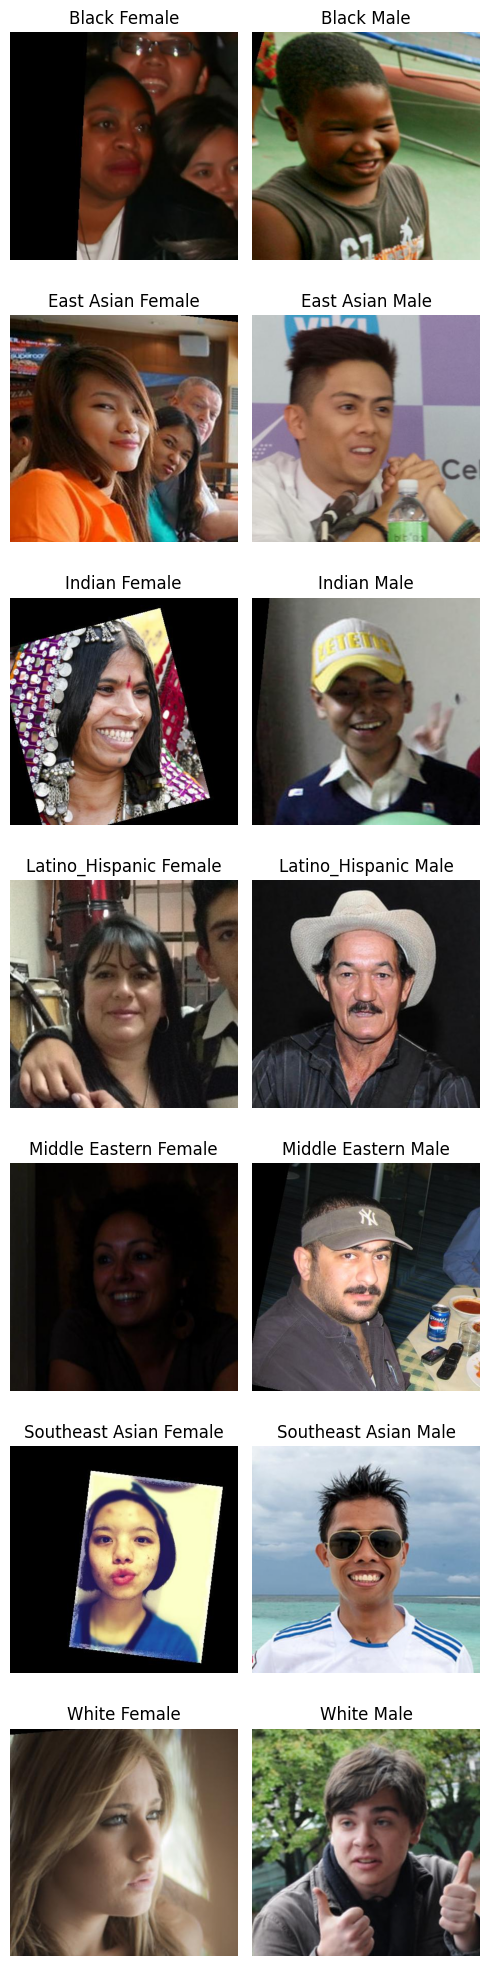

age                       0-2  10-19   20-29     3-9   30-39   40-49  50-59  \
gender race                                                                   
Female Black             91.0  850.0  1769.0   842.0  1323.0   682.0  371.0   
       East Asian       146.0  632.0  2902.0   675.0  1115.0   348.0  186.0   
       Indian            78.0  890.0  1704.0   695.0  1164.0   659.0  388.0   
       Latino_Hispanic  107.0  918.0  2004.0   837.0  1375.0   832.0  426.0   
       Middle Eastern    28.0  343.0  1041.0   248.0   616.0   327.0  155.0   
       Southeast Asian   76.0  718.0  1871.0   702.0   916.0   412.0  258.0   
       White            166.0  646.0  2972.0   640.0  1911.0   814.0  410.0   
Male   Black            188.0  668.0  1402.0  1230.0  1296.0   777.0  393.0   
       East Asian       262.0  544.0  1863.0  1061.0  1267.0   591.0  338.0   
       Indian            91.0  639.0  1373.0   835.0  1607.0   976.0  596.0   
       Latino_Hispanic   82.0  691.0  1527.0   752.0  1557.0  1125.0  698.0   
       Middle Eastern   106.0  392.0  1282.0   473.0  1782.0  1190.0  682.0   
       Southeast Asian  138.0  670.0  1639.0   821.0  1093.0   646.0  358.0   
       White            233.0  502.0  2249.0   597.0  2228.0  1365.0  969.0   

age                     60-69  more than 70  
gender race                                  
Female Black            165.0          44.0  
       East Asian        94.0          43.0  
       Indian           224.0         107.0  
       Latino_Hispanic  161.0          55.0  
       Middle Eastern    67.0          22.0  
       Southeast Asian  136.0          94.0  
       White            193.0          74.0  
Male   Black            114.0          28.0  
       East Asian       176.0          44.0  
       Indian           233.0          60.0  
       Latino_Hispanic  194.0          26.0  
       Middle Eastern   368.0          94.0  
       Southeast Asian  171.0          76.0  
       White            483.0          75.0

In [ ]:
# Import necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from PIL import Image

# Set seed.
np.random.seed(2831)

# Load the CSV files.
train_label_path = "data/train_label.csv"
val_label_path = "data/val_label.csv"
combined_label_path = "data/combined_label.csv"
train_df = pd.read_csv(train_label_path)
val_df = pd.read_csv(val_label_path)
combined_df = pd.read_csv(combined_label_path)

# Plot total rows in train_label.csv and val_label.csv.
train_rows = len(train_df)
val_rows = len(val_df)
plt.figure()
plt.bar("Training Data", train_rows)
plt.bar("Validation Data", val_rows)
plt.title("Total Rows in Training and Validation Datasets")
plt.ylabel("Number of Rows")
plt.tight_layout()
plt.savefig("results/explore_data/row_counts.png")
plt.show()
plt.close()

# Plot gender counts for training and validation datasets.
gender_counts_train = train_df["gender"].value_counts()
gender_counts_val = val_df["gender"].value_counts()
plt.figure()
x = [0, 1]
width = 0.35
plt.bar([pos - width/2 for pos in x], gender_counts_train, width=width, label="Training Data")
plt.bar([pos + width/2 for pos in x], gender_counts_val, width=width, label="Validation Data")
plt.title("Gender Counts")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.xticks(ticks=x, labels=["Male", "Female"])
plt.legend()
plt.tight_layout()
plt.savefig("results/explore_data/gender_counts.png")
plt.show()
plt.close()

# Plot race counts for training and validation datasets
race_counts_train = train_df["race"].value_counts()
race_counts_val = val_df["race"].value_counts()
race_counts_train = race_counts_train.sort_values(ascending=False)
unique_races = race_counts_train.index.tolist()
race_counts_val = race_counts_val.reindex(unique_races, fill_value=0)
x = range(len(unique_races))
plt.figure()
plt.bar([pos - width/2 for pos in x], race_counts_train, width=width, label="Training Data")
plt.bar([pos + width/2 for pos in x], race_counts_val, width=width, label="Validation Data")
plt.title("Race Counts")
plt.ylabel("Count")
plt.xlabel("Race")
plt.xticks(ticks=x, labels=unique_races, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("results/explore_data/race_counts.png")
plt.show()
plt.close()

# Define a helper function to extract numeric values for sorting age ranges.
def sort_age_ranges(age_range):
    match = re.match(r"(\d+)-(\d+)", age_range)
    if match:
        return int(match.group(1))
    return float("inf")

# Plot age distribution for training and validation datasets.
age_counts_train = train_df["age"].value_counts()
age_counts_val = val_df["age"].value_counts()
unique_ages = list(set(age_counts_train.index).union(set(age_counts_val.index)))
unique_ages.sort(key=sort_age_ranges)
age_counts_train = age_counts_train.reindex(unique_ages, fill_value=0)
age_counts_val = age_counts_val.reindex(unique_ages, fill_value=0)
x = range(len(unique_ages))
plt.figure()
plt.bar([pos - width/2 for pos in x], age_counts_train, width=width, label="Training Data")
plt.bar([pos + width/2 for pos in x], age_counts_val, width=width, label="Validation Data")
plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlabel("Age Range")
plt.xticks(ticks=x, labels=unique_ages, rotation=45) 
plt.legend()
plt.tight_layout()
plt.savefig("results/explore_data/age_distribution.png")
plt.show()
plt.close()

# Plot images of unique race-gender pairs from combined dataframe.
unique_pairs = combined_df.groupby(["race", "gender"])
sampled_images = unique_pairs.apply(lambda group: group.sample(1)).reset_index(drop=True)
fig, axes = plt.subplots(7, 2, figsize=(5, 20))
axes = axes.flatten()
for i, (index, row) in enumerate(sampled_images.iterrows()):
    file_path = f"data/{row['file']}"
    try:
        img = Image.open(file_path)
        ax = axes[i]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"{row['race']} {row['gender']}")
    except Exception as e:
        print(f"Error {e} occurred while loading image {file_path}.")
plt.tight_layout()
plt.savefig("results/explore_data/sample_images.png")
plt.show()

# Display occurrences grouped by gender, race, and age.
counts = train_df.groupby(["gender", "race", "age"]).size().reset_index(name="count")
pivot_table = counts.pivot_table(index=["gender", "race"], columns="age", values="count", fill_value=0)
display(pivot_table)
pivot_table.to_csv("results/explore_data/group_counts.csv")
